### Web Scraping: requests, parsel and selenium

Python’s requests library is extremely power in web application scripting. It supports `get`, `post`, `put` and other HTTP request methods.

`get request syntax`

<div>
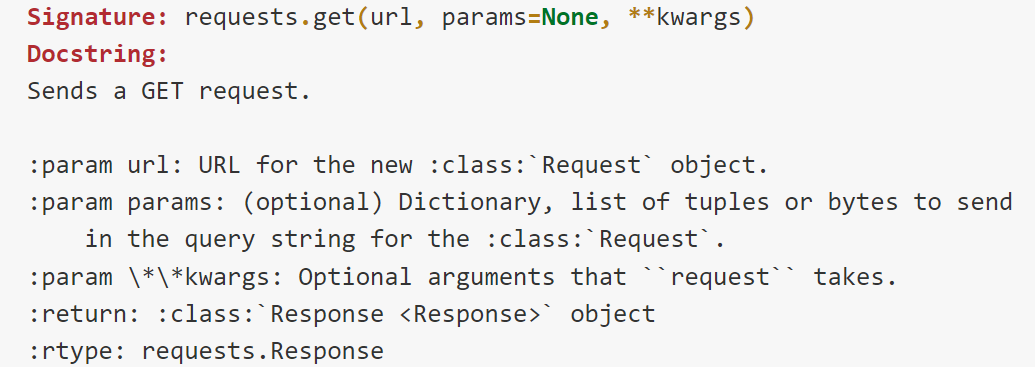
</div>

In [ ]:
# installation of requests
!pip3 install requests

In [ ]:
# installation of parsel
!pip3 install parsel

In [ ]:
import requests
import parsel
import csv
import pandas as pd
import time
import re

In [ ]:
r = requests.get('https://www.ucmo.edu')

In [ ]:
# check the response type
type(r)

In [ ]:
# response status code
r.status_code

In [ ]:
# raise an exception if the response status code is not 200
r.raise_for_status()

In [ ]:
# dictionary of all response headers
r.headers

In [ ]:
# response text
# access the response body as bytes such as image, etc. use r.content
r.text[:1000]

In [ ]:
# length of the response text
len(r.text)

In [ ]:
# the response object also contains the orginal request object
r.request.url

In [ ]:
# the request headers
r.request.headers

In [ ]:
# encoding inferred from the repsonse headers, ISO-8859-1 is the default encoding if charset is not available in headers
# is used when you access r.text
r.encoding

In [ ]:
# encoding inferred from the response text, more accurate
r.apparent_encoding

### The Template for Pull html of a Website

In [ ]:
def getHTMLText(url):
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36', "Upgrade-Insecure-Requests": "1","DNT": "1","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8","Accept-Language": "en-US,en;q=0.5","Accept-Encoding": "gzip, deflate"}
        r = requests.get(url, headers = headers)
        r.raise_for_status() # raise an exception if status code is not 200
        r.encoding = r.apparent_encoding
        return r.text
    except:
        return ''
    
if __name__ == '__main__':
    url = 'https://www.ucmo.edu'
    print(getHTMLText(url)[:1000])

### Parsel
Parsel is a BSD-licensed Python library to extract and remove data from HTML and XML using [XPath](https://www.w3schools.com/xml/xpath_syntax.asp) and [CSS selectors](https://www.w3schools.com/cssref/css_selectors.asp), optionally combined with regular expressions. You can use either `CSS` or `XPath`. `CSS` is usually more readable, but some things can only be done with `XPath`

+ `get()`: always returns a single result; if there are several matches, content of a first match is returned; if there are no matches, None is returned
+ `getall()`: returns a list with all results

#### Nesting selectors
The selection methods (`.xpath()` or `.css()`) return a list of selectors of the same type, so you can call the selection methods for those selectors too

#### CSS Selector
+ to select text nodes, use `::text`
+ to select attribute values, use `::attr(name)` where name is the name of the attribute that you want the value of

#### Xpath Selector
+ to select text nodes, use `/text()`
+ to select attribute values, use `/@name` where name is the name of the attribute that you want the value of

<div>
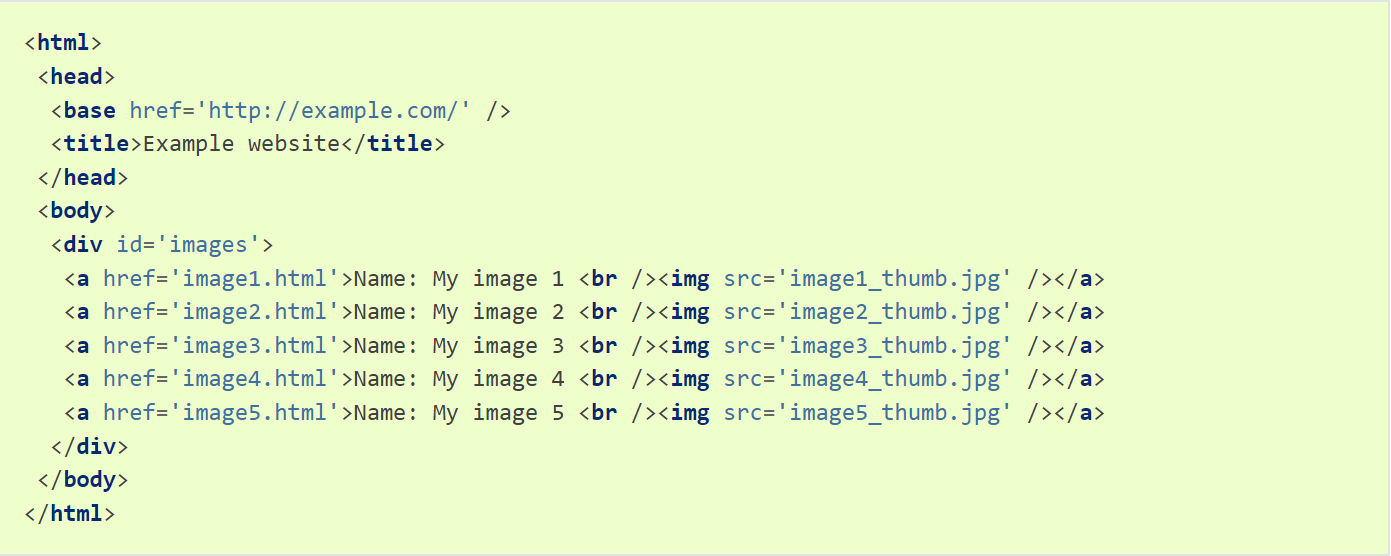
</div>

In [ ]:
r = requests.get('https://parsel.readthedocs.io/en/latest/_static/selectors-sample1.html')
selector = parsel.Selector(r.text)

#### Select the text inside the `title` tag

In [ ]:
selector.xpath('//title/text()')

In [ ]:
selector.css('title::text')

As you can see, `.xpath()` and `.css()` methods return a SelectorList instance, which is a list of new selectors. This API can be used for quickly selecting nested data. To actually extract the textual data, you must call the selector `.get()` or `.getall()` methods

In [ ]:
selector.xpath('//title/text()').get()

In [ ]:
selector.css('title::text').getall()

In [ ]:
selector.xpath('//div[@id="images"]/a/text()').get()

In [ ]:
selector.xpath('//div[@id="images"]/a/text()').getall()

In [ ]:
selector.css('img').xpath('@src').getall()

In [ ]:
selector.css('img::attr(src)').getall()

#### Selecting Element Attributes

In [ ]:
selector.xpath("//a/@href").getall()

In [ ]:
selector.css('a::attr(href)').getall()

### Selenium

JavaScript presents particular challenges when doing website crawling. Fortunately, Selenium has an excellent framework for handling complicated websites. Selenium is a powerful web scraping tool developed originally for website testing. Selenium does not contain its web browser. It requires integration with third-party browsers in order to run. The Chrome webdriver can be downloaded from the ChromeDriver website `https://chromedriver.chromium.org/downloads`

#### The WebDriver Object
The `WebDriver` object like a browser in that it can load websites, but it can also be used to find page elements, interact with elements on the page such as send text, click, etc., and do other actions to drive the web scrapers.

+ Navigate to url: `driver.get('url')`
+ Obtain the rendered page: `driver.page_source`
+ Obtain the cookie: `driver.get_cookies()`
+ Obtian the current url: `driver.current_url`
+ Take a screenshot: `driver.save_screenshot('image.png')`
+ Move forward to the next page: `driver.forward()`
+ Back to the prvious page: `driver.back()`
+ Get all current windows: `driver.window_handles`, for example, `current_window = driver.window_handles`
+ Switch window by index: for example, `driver.switch_to.window(current_window[1])`
+ Switch to frame: `driver.switch_to.frame()`
+ Close a page: `driver.close()`
+ Close the browser: `driver.quit()`

#### Finding Web Elements
One of the most fundamental aspects of using Selenium is obtaining element references to work with.

When the find element method `find_element()` is called on the driver instance, it returns a reference to the first element in the DOM that matches with the provided locator. There are several use cases for needing to get references to all elements that match a locator, rather than just the first one. The plural find elements methods `find_elements()` return a collection of element references. If there are no matches, an empty list is returned. 

#### Locators
Selenium provides support for these 8 traditional location strategies in WebDriver. Picture source: https://www.selenium.dev/documentation/webdriver/elements/locators/

<div>
<img src="attachment:f1.png" width="600"/>
</div>
    
By.ID
By.CLASS_NAME
By.CSS_SELECTOR
By.LINK_TEXT
By.TAG_NAME
By.NAME
By.PARTIAL_LINK_TEXT
By.XPATH

### Case Study I
In this example, we will get all graduate programs offer at UCM and their websites

#### Using Requests and Parsel

In [ ]:
# installation of parsel
!pip3 install parsel

In [ ]:
# the response of requests cannot obtain the dynamic web contents
r = requests.get('https://www.ucmo.edu/academics/programs/masters-degrees/index.php')

In [ ]:
selector = parsel.Selector(r.text)

In [ ]:
programs = selector.xpath('//*[@id="listTwo"]/div/div/h3/a')
print(programs)

#### Using Selenium

In [ ]:
# installation of Selenium
!pip3 install selenium

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

In [ ]:
chrome_options = Options()
# webdriver is saved under the anaconda Python folder
# otherwise executable_path must point at the location of the downloaded Chrome_Driver application
driver = webdriver.Chrome() 
driver.get('https://www.ucmo.edu/academics/programs/masters-degrees/index.php/')
driver.implicitly_wait(10)
programs = driver.find_elements(By.XPATH, '//*[@id="listTwo"]/div/div/h3/a')
for program in programs:
    name = program.text
    link = program.get_attribute('href')
    print(name, link)

### Case Study II

In [ ]:
chrome_options = Options()
# webdriver is saved under the anaconda Python folder
# otherwise executable_path must point at the location of the downloaded Chrome_Driver application
driver = webdriver.Chrome() 
driver.get('https://www.homedepot.com/')
driver.find_element_by_css_selector('#headerSearch').send_keys('bag')
driver.find_element_by_css_selector('#headerSearch').send_keys(Keys.ENTER)

In [ ]:
def getProductInfo(driver):
    driver.implicitly_wait(10)
    divs1 = driver.find_elements_by_css_selector('#browse-search-pods-1  div.browse-search__pod.col__true-12.col__6-12--xs.col__4-12--sm.col__3-12--md.col__3-12--lg')
    divs2 = driver.find_elements_by_css_selector('#browse-search-pods-2  div.browse-search__pod.col__true-12.col__6-12--xs.col__4-12--sm.col__3-12--md.col__3-12--lg')
    for i in divs1 + divs2:
        try:
            title = i.find_element_by_css_selector('.product-pod__title__product').text
            r = i.find_elements_by_css_selector('#standard-price > div > div > span')
            print(title, r[0].text + r[1].text + '.' + r[2].text)
        except:
            continue
    driver.find_element_by_css_selector('a[aria-label = "Next"]').click()

In [ ]:
for page in range(1, 6):
    print(f'====================Retrieving Products on Page {page}============================')
    time.sleep(1)
    getProductInfo(driver)

driver.close()   

### Case Study: Download TikTok Videos

#### Step 1: Download a Single Video

Use the Chrome Web Developer Inspect

In [ ]:
headers = {    
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36 Edg/97.0.1072.76'
    
}
chrome_options = Options()
# webdriver is saved under the anaconda Python folder
# otherwise executable_path must point at the location of the downloaded Chrome_Driver application
driver = webdriver.Chrome() 
driver.execute_cdp_cmd('Page.addScriptToEvaluateOnNewDocument', {'source': """object.defineProperty(navigator, 'webdriver', {get: () => false})"""})
driver.get('https://www.tiktok.com/@lauramarano/video/7059113976428236079')
driver.implicitly_wait(10)
videos = driver.find_elements(By.XPATH, '//*/video')
titles = driver.find_elements(By.XPATH, '//*[@id="app"]/div[2]/div[2]/div[1]/div[1]/div/div[1]/h4/a')
for title, video in zip(titles, videos):
    m_title = title.text
    link = video.get_attribute('src')
    print(m_title, link)
    # download the video using requests
    video_content = requests.get(link, headers = headers).content
    with open('video\\' + m_title + '.mp4', 'wb') as f:
        f.write(video_content)

### Download a Single Video Using RE

In [ ]:
url = 'https://www.tiktok.com/@lauramarano/video/7059113976428236079'
headers = {    
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36 Edg/97.0.1072.76'
    
}
r = requests.get(url, headers = headers)
print(r.text)

# use regular expression to extract the download url
video_url = re.findall('"downloadAddr":"(.*?)","shareCover"', r.text)[0]
print(video_url)

# replace \u002F by /
video_url = video_url.replace('\\u002F', '/')
print(video_url)

# use regular expression to extract the title of the video
title = re.findall('<title data-rh="true">(.*?)</title>', r.text)[0]
title =re.sub('\s', '_', title)
title =re.sub('\W', '', title)
title =re.sub('_', ' ', title)
print(title)

# download the video using requests
video_content = requests.get(video_url, headers = headers).content

with open('video\\' + title + '.mp4', 'wb') as f:
    f.write(video_content)


### Download Multiple Videos from the Artists

Right click the webpage to viewsource

In [ ]:
driver = webdriver.Chrome() 
driver.get('https://www.tiktok.com/@lauramarano')
driver.implicitly_wait(10)
divs1 = driver.find_elements_by_css_selector('div.tiktok-yz6ijl-DivWrapper.e1u9v4ua1')
divs2 = driver.find_elements_by_css_selector('div.tiktok-1jxhpnd-DivContainer.e1yey0rl0')
for div1, div2 in zip(divs1, divs2):
    url = div1.find_element_by_css_selector('a').get_attribute('href')
    title = div2.find_element_by_css_selector('img').get_attribute('alt')
    title =re.sub('\s', '_', title)
    title =re.sub('\W', '', title)
    title =re.sub('_', ' ', title)
    print(url, title) 
    
